In [236]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [298]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

### Import Dataset

In [238]:
from sklearn.datasets import load_breast_cancer

In [239]:
data = load_breast_cancer()

In [240]:
# Features
X = data["data"]
X = pd.DataFrame(X)
X.columns = data["feature_names"]
X[::100]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,16.99,35.27,108.60,906.5,0.1265,0.1943,0.3169,0.1184,0.2651,0.07397
200,12.23,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.06013,...,14.44,28.36,92.15,638.4,0.1429,0.2042,0.1377,0.1080,0.2668,0.08174
300,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,...,25.93,26.24,171.10,2053.0,0.1495,0.4116,0.6121,0.1980,0.2968,0.09929
400,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,20.80,27.78,149.60,1304.0,0.1873,0.5917,0.9034,0.1964,0.3245,0.11980
500,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,0.1668,0.06869,...,16.76,20.43,109.70,856.9,0.1135,0.2176,0.1856,0.1018,0.2177,0.08549


### Decision Tree Classification

In [241]:
# Target
y = data["target"]
y[::100]

array([0, 0, 1, 0, 0, 1])

In [242]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 42)


In [243]:
# Find Best Tree Depth
tree_score = []
for t in range(1, 10):
    tree = DecisionTreeClassifier(max_depth = t)
    tree.fit(x_train, y_train)
    yhat = tree.predict(x_test)
    score = accuracy_score(y_test, yhat)
    tree_score.append(score)
tree_score

[0.9122807017543859,
 0.9181286549707602,
 0.9239766081871345,
 0.9298245614035088,
 0.9298245614035088,
 0.9239766081871345,
 0.9239766081871345,
 0.9122807017543859,
 0.9239766081871345]

In [244]:
# Best Tree Depth
best_depth = tree_score.index(max(tree_score)) + 1
print("Best Depth = " + str(best_depth))
print("Best Depth Accuracy = " + str(tree_score[best_depth - 1]))

Best Depth = 4
Best Depth Accuracy = 0.9298245614035088


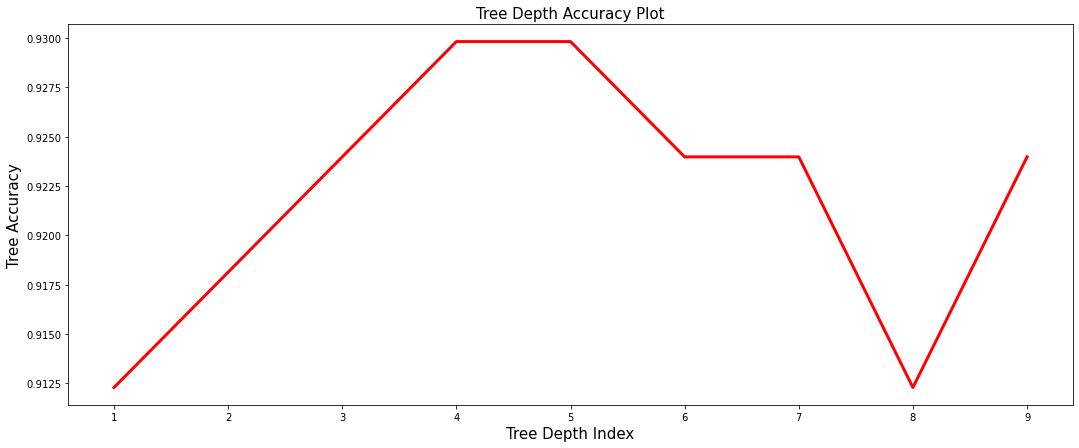

In [245]:
tree_list = range(1, 10)
plt.figure(figsize = (18, 7))
plt.plot(tree_list, tree_score, color = "red", linewidth = 3)
plt.title("Tree Depth Accuracy Plot", size = 15)
plt.xlabel("Tree Depth Index", size = 15)
plt.ylabel("Tree Accuracy", size = 15)
plt.show()

In [246]:
dt = DecisionTreeClassifier(max_depth = 3)

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[::10]

,Actual,Predicted
0,0,0
10,1,1
20,1,1
30,1,1
40,1,1
50,1,1
60,0,0
70,0,0
80,1,1
90,0,0


In [247]:
score = accuracy_score(y_test, y_pred)
print("Accuracy score of Model is =", score)

Accuracy score of Model is = 0.9239766081871345


### Train classification tree using (radius_mean) and (concave point_mean) 

In [248]:
# Features
frc = X[["mean radius", "mean concave points"]]

# Target
trc = data["target"]

In [249]:
x_train, x_test, y_train, y_test = train_test_split(frc,
                                                    trc,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [250]:
tree_array = []
for t in range(1, 10):
    tree = DecisionTreeClassifier(max_depth = t)
    tree.fit(x_train, y_train)
    yhat = tree.predict(x_test)
    score = accuracy_score(y_test, yhat)
    tree_array.append(score)
tree_array

[0.8947368421052632,
 0.9122807017543859,
 0.9035087719298246,
 0.9035087719298246,
 0.9035087719298246,
 0.8947368421052632,
 0.9035087719298246,
 0.9035087719298246,
 0.9035087719298246]

In [251]:
# Best Tree Depth
best_depth = tree_array.index(max(tree_array)) + 1
print("Best Tree Depth =", best_depth)
print("Best Tree Depth Accuracy =", tree_array[best_depth - 1])

Best Tree Depth = 2
Best Tree Depth Accuracy = 0.9122807017543859


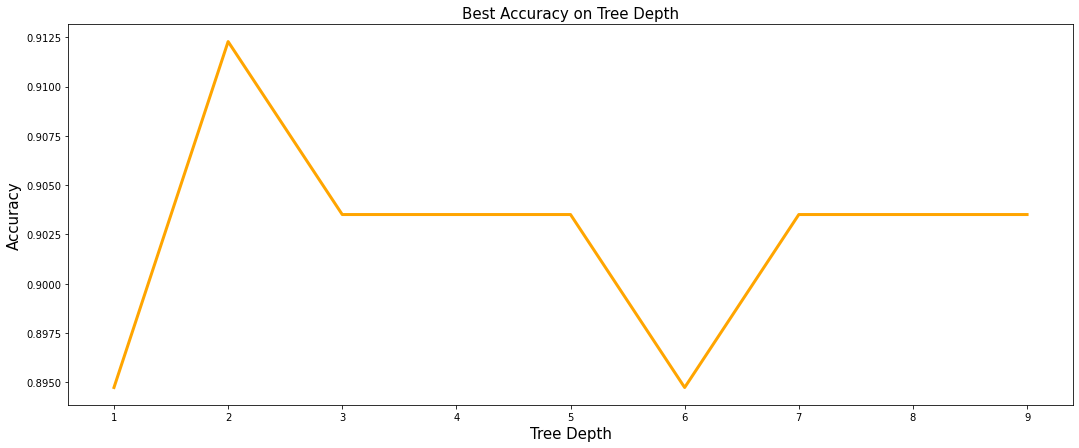

In [252]:
tree_list = range(1, 10)
plt.figure(figsize = (18, 7))
plt.plot(tree_list, tree_array, color = "orange", linewidth = 3)
plt.title("Best Accuracy on Tree Depth", size = 15)
plt.xlabel("Tree Depth", size = 15)
plt.ylabel("Accuracy", size = 15)
plt.show()

In [253]:
dt = DecisionTreeClassifier(max_depth = 2)

dt.fit(x_train, y_train)

yhat = dt.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": yhat})[::10]

,Actual,Predicted
0,1,1
10,1,1
20,0,1
30,1,1
40,1,1
50,0,0
60,1,1
70,0,0
80,0,0
90,1,1


In [254]:
score = accuracy_score(y_test, yhat)
score

0.9122807017543859

### Classification tree learning (gini)

In [267]:
# Features
fmw = X[["mean radius", "mean concave points"]]

# Target
tmw = data["target"]

In [268]:
x_train, x_test, y_train, y_test = train_test_split(fmw,
                                                    tmw,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [269]:
tree_array = []
for t in range(1, 10):
    tree = DecisionTreeClassifier(criterion = "gini", max_depth = t, random_state = 42)
    tree.fit(x_train, y_train)
    yhat = tree.predict(x_test)
    score = accuracy_score(y_test, yhat)
    tree_array.append(score)
tree_array

[0.8947368421052632,
 0.8947368421052632,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9181286549707602,
 0.9122807017543859,
 0.9239766081871345,
 0.9239766081871345]

In [273]:
best_depth = tree_array.index(max(tree_array)) + 1 
print("Best Tree Depth =", str(best_depth))
print("Best Tree Accuracy =", tree_array[best_depth - 1])

Best Tree Depth = 8
Best Tree Accuracy = 0.9239766081871345


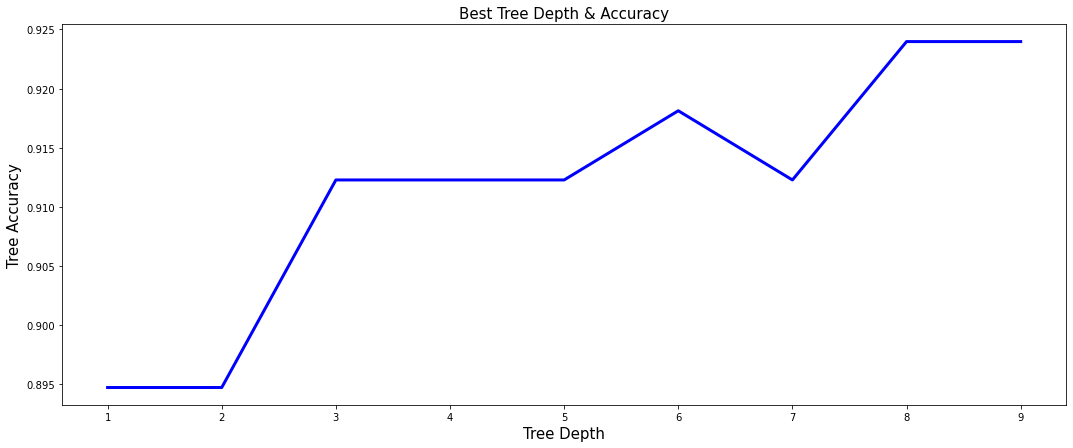

In [275]:
tree_list = range(1, 10)
plt.figure(figsize = (18, 7))
plt.plot(tree_list, tree_array, color = "blue", linewidth = 3)
plt.title("Best Tree Depth & Accuracy", size = 15)
plt.xlabel("Tree Depth", size = 15)
plt.ylabel("Tree Accuracy", size = 15)
plt.show()

In [277]:
tree = DecisionTreeClassifier(criterion = "gini", max_depth = 8, random_state = 42)
tree.fit(x_train, y_train)
yhat = tree.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": yhat})[0::50]

,Actual,Predicted
0,1,1
50,0,0
100,0,0
150,0,0


In [280]:
score = accuracy_score(y_test, yhat)
score

0.9239766081871345

### Classification tree learning (Entropy)

In [282]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

In [283]:
tree_array = []
for t in range(1, 10):
    tree = DecisionTreeClassifier(criterion = "entropy", max_depth = t, random_state = 42)
    tree.fit(x_train, y_train)
    yhat = tree.predict(x_test)
    score = accuracy_score(y_test, yhat)
    tree_array.append(score)
tree_array

[0.8947368421052632,
 0.9181286549707602,
 0.9707602339181286,
 0.9590643274853801,
 0.9532163742690059,
 0.9532163742690059,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544]

In [285]:
best_depth = tree_array.index(max(tree_array)) + 1
print("Best Tree Depth =", str(best_depth))
print("Best Tree Accuracy =", tree_array[best_depth - 1])

Best Tree Depth = 3
Best Tree Accuracy = 0.9707602339181286


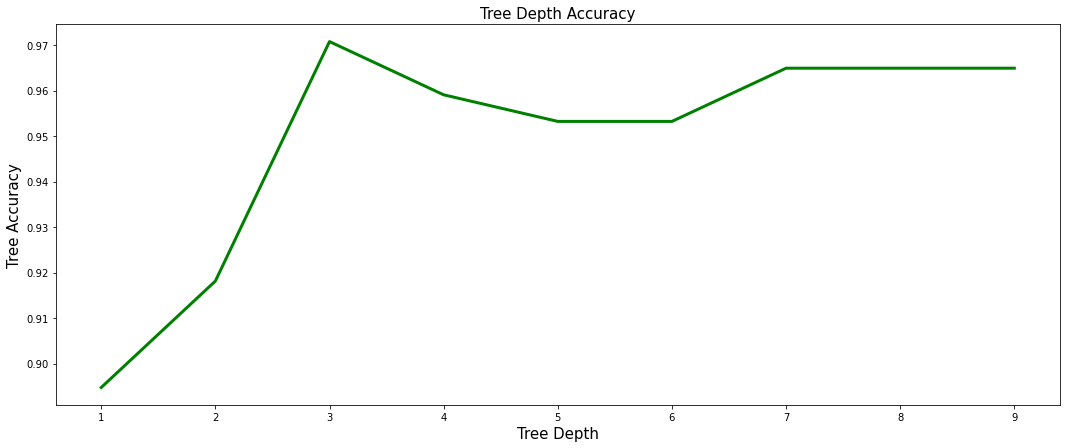

In [287]:
tree_list = range(1, 10)
plt.figure(figsize = (18, 7))
plt.plot(tree_list, tree_array, color = "green", linewidth = 3)
plt.title("Tree Depth Accuracy", size = 15)
plt.xlabel("Tree Depth", size = 15)
plt.ylabel("Tree Accuracy", size = 15)
plt.show()

In [288]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state = 42)
tree.fit(x_train, y_train)
yhat = tree.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": yhat})[::10]

,Actual,Predicted
0,1,1
10,1,1
20,0,1
30,1,1
40,1,1
50,0,0
60,1,1
70,0,0
80,0,0
90,1,1


In [290]:
score = accuracy_score(y_test, yhat)
print("Tree Depth Accuracy =", score)

Tree Depth Accuracy = 0.9707602339181286


### Decision Tree Regression

### Cars Dataset

In [324]:
df = pd.read_csv("auto.csv")
df[::40]

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
40,35.1,81.0,60,1760,16.1,Asia,10.0
80,30.7,145.0,76,3160,19.6,Europe,15.0
120,27.0,101.0,83,2202,15.3,Europe,10.0
160,31.0,91.0,68,1970,17.6,Asia,10.0
200,19.0,232.0,90,3211,17.0,US,15.0
240,25.4,183.0,77,3530,20.1,Europe,12.5
280,26.6,151.0,84,2635,16.4,US,10.0
320,35.7,98.0,80,1915,14.4,US,10.0
360,24.0,200.0,81,3012,17.6,US,15.0


In [325]:
df = pd.get_dummies(df)
df

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0
...,...,...,...,...,...,...,...,...,...
387,18.0,250.0,88,3021,16.5,15.0,0,0,1
388,27.0,151.0,90,2950,17.3,10.0,0,0,1
389,29.5,98.0,68,2135,16.6,10.0,1,0,0
390,17.5,250.0,110,3520,16.4,15.0,0,0,1


In [326]:
x = df[df.columns.drop(["origin_Asia", "origin_Europe", "origin_US"])]
y = df["origin_US"]

In [327]:
dtr = DecisionTreeRegressor(random_state = 42)

parameters = {"max_depth": np.arange(1, 10),
              "min_samples_leaf": np.linspace(0, 1, 11)}

searcher = GridSearchCV(dtr, parameters)

# Split the data into train data and test data
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

searcher.fit(x_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'max_depth': 3, 'min_samples_leaf': 0.1}
Best CV accuracy 0.5694802830307621


### Predict Miles per Gallon

In [331]:
X = df[df.columns.drop(["mpg", "origin_Asia", "origin_Europe", "origin_US"])]
y = df["mpg"]

In [338]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

dt = DecisionTreeRegressor(random_state = 42)

parameters = {"max_depth": np.arange(1, 10),
              "min_samples_leaf": np.linspace(0, 1, 11)}

searcher = GridSearchCV(dt, parameters)

searcher.fit(x_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV parameters", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV parameters {'max_depth': 3, 'min_samples_leaf': 0.1}
Best CV accuracy 0.6815383770270291


In [340]:
y_pred = searcher.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[:20]

,Actual,Predicted
78,23.0,20.342857
274,21.0,20.342857
246,18.0,15.527273
55,30.9,27.175472
387,18.0,20.342857
203,34.0,27.175472
42,16.5,15.527273
233,20.2,20.342857
150,13.0,15.527273
116,39.1,34.693548
